Wine Quality Dataset

In [2]:
#importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/winequality-red.csv')

Below is an outline of my approach to the wine quality classification project

I began with the wine quality dataset, which includes various physicochemical measurements (e.g., alcohol, volatile acidity, sulphates) as features and a “quality” score (ranging from 3 to 8) as the target label. Upon inspection, I confirmed that there were no missing values. However, I did find duplicate records and removed them



Since the original quality scores span from 3 to 8, I decided to convert this into a binary classification task. I labeled wines with a quality score of 7 or higher as “good,” and all others as “bad.” My thinking  was that, although scores of 5 or 6 may be somewhat subjective, a score of 7 or above generally indicates a broadly acceptable wine. After binarization, I discovered that only about 13% of the samples fell into the “good” category, resulting in a class imbalance.


I plotted histograms for each feature and observed that several of them exhibit skewed distributions. Given my initial plan to use tree-based models (which are generally robust to skewness), I chose not to apply any transformations at this stage.


To identify features with the greatest impact, I generated a correlation matrix. This revealed that variables such as alcohol content, volatile acidity, and sulphates accounted for a large portion of the variance. Despite this insight, I did not drop or modify any features because i think decision tree decision trees can handle and will spilit accordinly



After splitting the data into training and test sets, I applied Synthetic Minority Over‐sampling Technique (SMOTE) to the training data to balance the “good” and “bad” classes (only on training). Once SMOTE had been performed, I standardized all features (mean = 0, standard deviation = 1) before proceeding to modelling.
In my first modelling pipeline, I trained three classifiers:
•	Decision Tree
•	Random Forest
•	AdaBoost


I used F1 score as my primary evaluation metric because the class distribution was highly imbalanced. Unfortunately, each of these models achieved an F1 score of only approximately 0.50 on the test set, which I consider unsatisfactory.


Hoping to improve performance, I created a second pipeline that began with principal component analysis (PCA) for dimensionality reduction. My intention was that reducing dimensionality might indirectly address skewness without requiring explicit transformations for each feature. On the resulting principal components, I then trained:
•	k-Nearest Neighbors (KNN)
•	Support Vector Classifier (SVC)
•	Gradient Boosting Classifier


Despite this change, the F1 scores on the test set again hovered around 0.50, indicating that the adjustments did not substantially improve performance.


At this point, I am not seeing any meaning results and would like to seek your guidance on it. My initial thought process was to train a bunch of models and select the best performing one and then tune it for better results. Would like to hear your thoughts on my approach and where i could improve and whether my approach was correct or not.






In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [7]:
df.isnull().sum()
# no null values found

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [8]:
df.shape

(1599, 12)

In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


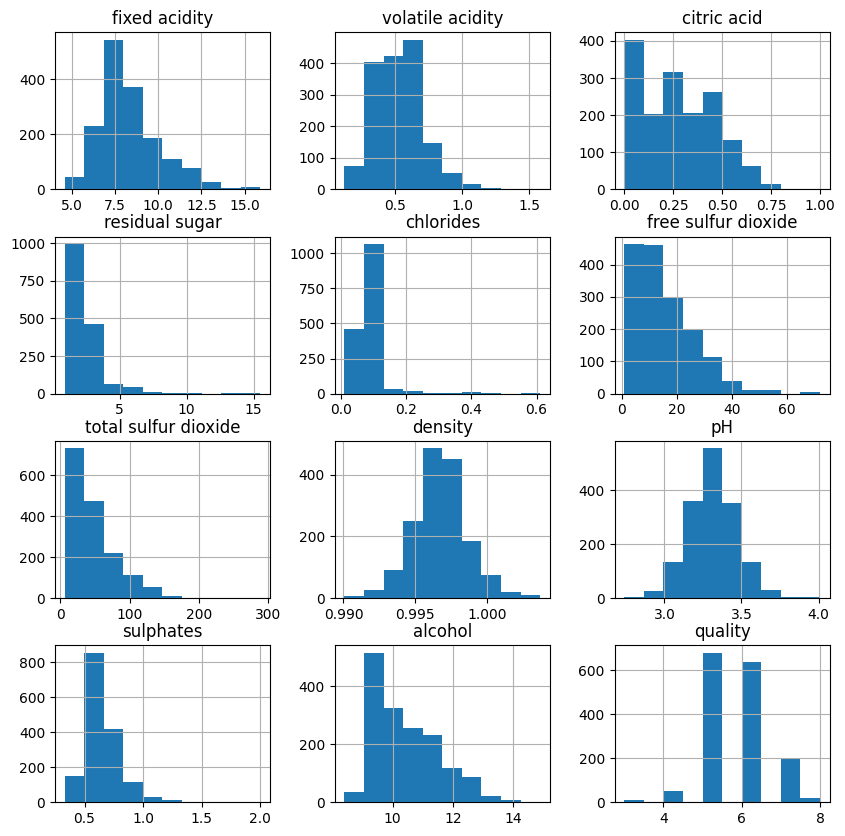

In [10]:
# hist plot to understand distribution
df.hist(bins=10, figsize=(10, 10))
plt.show()


In [11]:
df.duplicated().sum()

np.int64(240)

240 values are duplicates, removing them

In [12]:
df = df.drop_duplicates()
#check current shape of dataset
df.shape

(1359, 12)

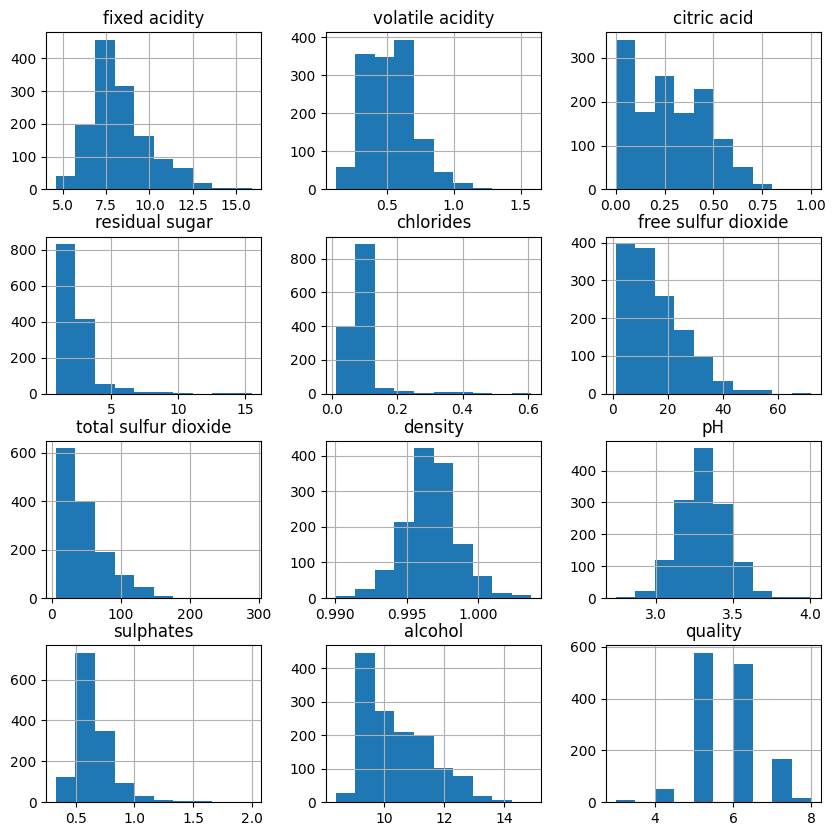

In [13]:
import matplotlib.pyplot as plt
df.hist(bins=10, figsize=(10, 10))
plt.show()

In [14]:
# the mean and std deviation have changed but only slightly
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


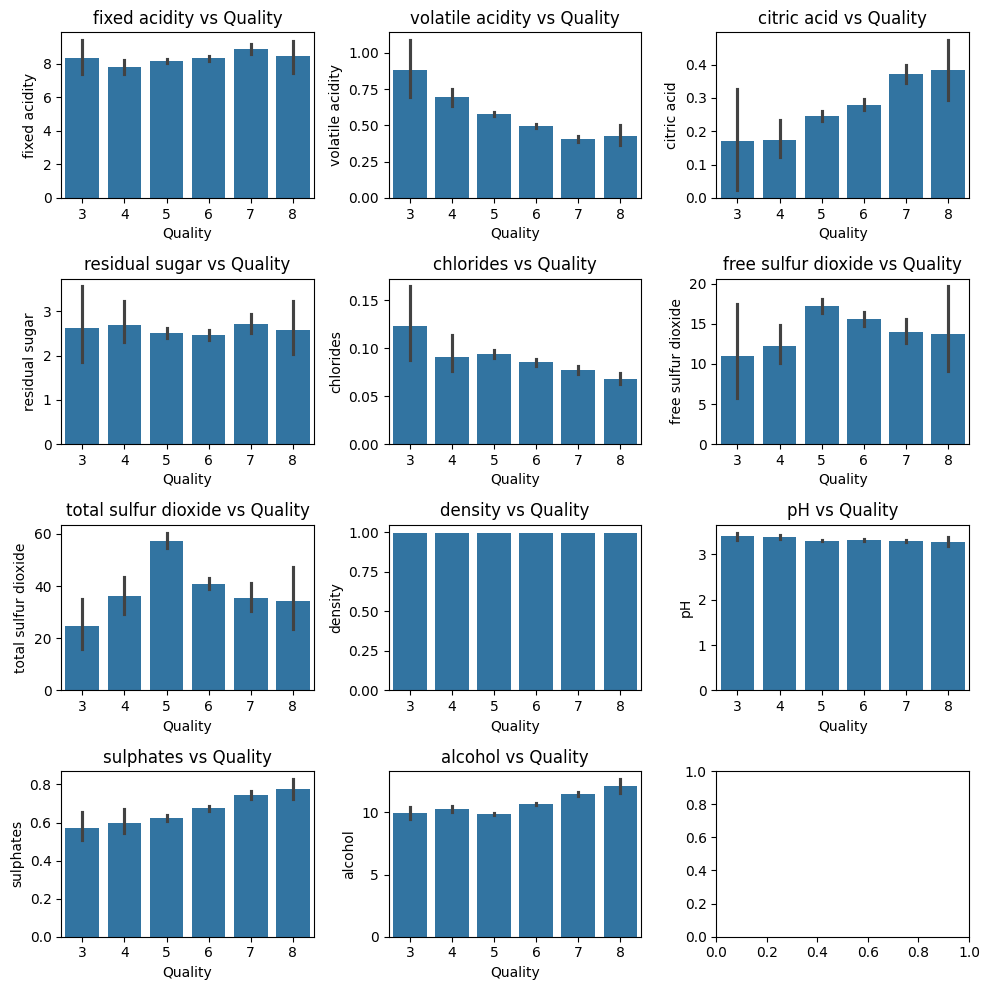

In [15]:
# Bar plot for quality vs features
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10,10)) #create a figure (size can be anything) and an gird of axes 4x3
axes = axes.flatten() # convert 2d to 1d so no need to do matrix like iteration

features = df.columns.tolist() #convert columns into a list so that they can be iterated
features.remove('quality') # drop target label

for i, col in enumerate(features):
    sns.barplot(x='quality', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col} vs Quality')
    axes[i].set_xlabel('Quality')
    axes[i].set_ylabel(col)

plt.tight_layout() #adjusts the plot, prevents overlapping
plt.show()

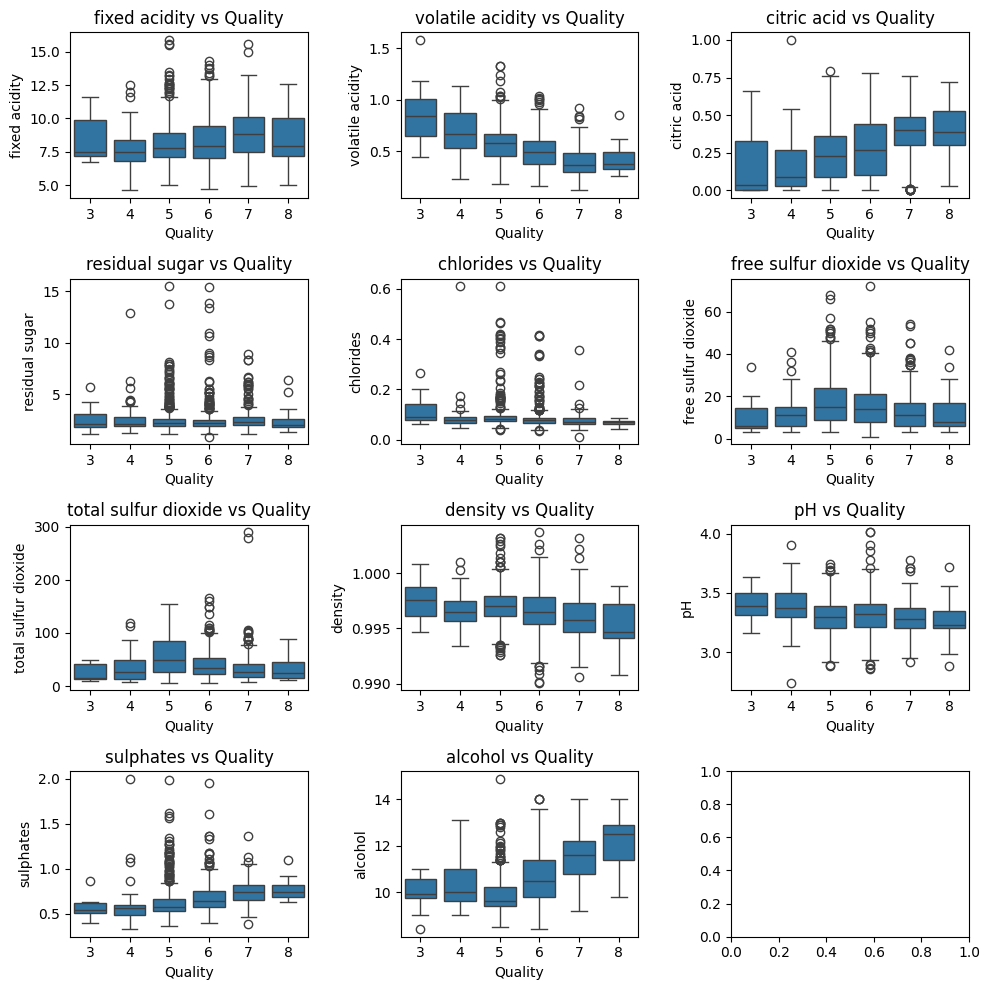

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for quality vs features
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 10))
axes = axes.flatten()

features = df.columns.tolist()
features.remove('quality')

for i, col in enumerate(features):
    # Changed sns.barplot to sns.boxplot
    sns.boxplot(x='quality', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col} vs Quality')
    axes[i].set_xlabel('Quality')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

<Axes: >

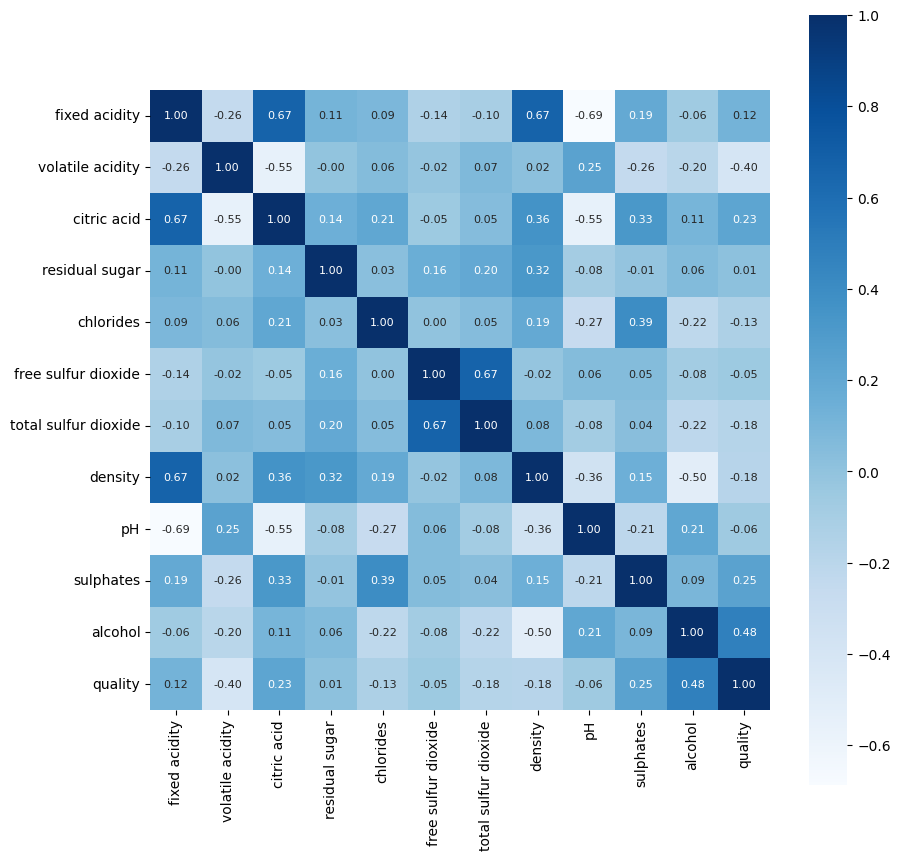

In [17]:
# constructing a heatmap to understand the correlation between the columns
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.2f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

Most important features based on correlation with quality:
alcohol                 0.480343
volatile acidity        0.395214
sulphates               0.248835
citric acid             0.228057
density                 0.184252
total sulfur dioxide    0.177855
chlorides               0.130988
fixed acidity           0.119024
pH                      0.055245
free sulfur dioxide     0.050463
Name: quality, dtype: float64


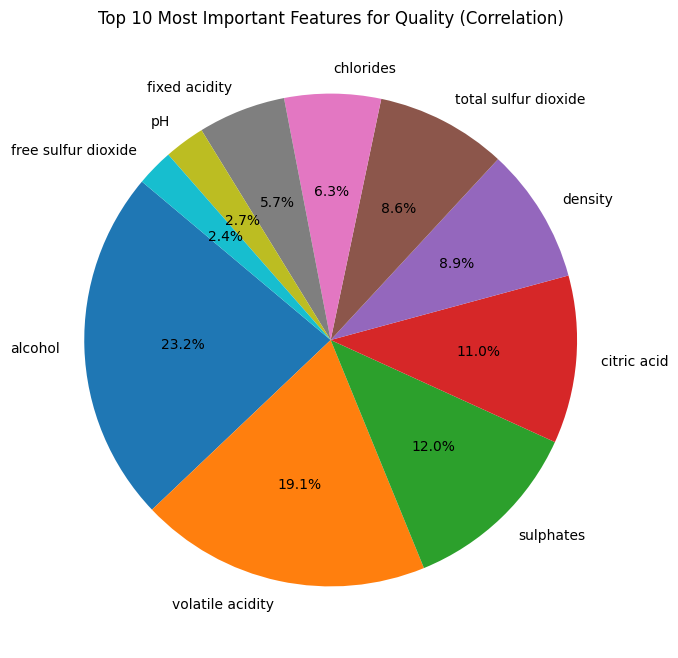

In [18]:
import matplotlib.pyplot as plt
# Get the absolute correlation values with 'quality'
quality_correlation = correlation['quality'].abs().sort_values(ascending=False)

# Remove the correlation of 'quality' with itself
quality_correlation = quality_correlation.drop('quality')

# Select the top N most important features (you can adjust N)
n = 10
most_important_features = quality_correlation.head(n)

print("Most important features based on correlation with quality:")
print(most_important_features)

# Create a pie chart of the top most important features
plt.figure(figsize=(8, 8))
plt.pie(most_important_features, labels=most_important_features.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Top {n} Most Important Features for Quality (Correlation)')
plt.show()

In [19]:
# checking the distribution of quality column
df['quality'].value_counts()


,count
quality,
5,577
6,535
7,167
4,53
8,17
3,10


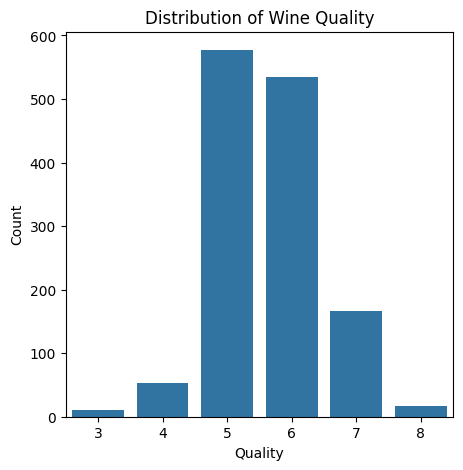

Quality Value Counts:
| quality   | count   |
|:----------|:--------|
| 3         | 10      |
| 4         | 53      |
| 5         | 577     |
| 6         | 535     |
| 7         | 167     |
| 8         | 17      |

Total Count: 1359


In [20]:
import matplotlib.pyplot as plt
# Visualize the distribution of quality
plt.figure(figsize=(5, 5))
sns.countplot(x='quality', data=df)
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

# Print the count of each quality value in a table
quality_counts = df['quality'].value_counts().sort_index()
quality_counts = quality_counts[(quality_counts.index >= 3) & (quality_counts.index <= 8)]

print("Quality Value Counts:")
print(quality_counts.to_markdown(numalign="left", stralign="left"))

total_count = quality_counts.sum()
print(f"\nTotal Count: {total_count}")

In [21]:
#binarizing the target variable as Good (1) or bad (0)
# good based on whether it is orgianlly 7 or above

df['quality'] = [1 if x>=7 else 0 for x in df['quality']]
df['quality'].value_counts()

,count
quality,
0,1175
1,184


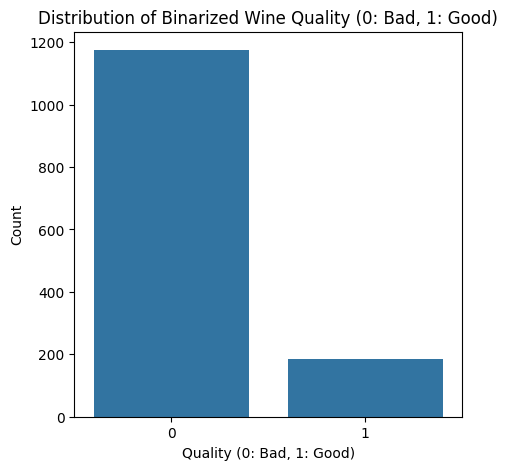

In [22]:
# plot the countplot of quality values

plt.figure(figsize=(5, 5))
sns.countplot(x='quality', data=df)
plt.title('Distribution of Binarized Wine Quality (0: Bad, 1: Good)')
plt.xlabel('Quality (0: Bad, 1: Good)')
plt.ylabel('Count')
plt.show()


will need to do imbalance handling but before that train test split

In [23]:
# naming convention X for features and lower case y for targets
X = df.drop("quality", axis=1)
y = df["quality"]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [24]:
print(X_train.shape)
y_train.value_counts()

(1087, 11)


,count
quality,
0,937
1,150


In [25]:
# APPLY LOG TRANSFORMATION TO SKEWED FEATURES
# List of skewed features identified from the histograms
skewed_features = [
    'fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides',
    'free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'alcohol'
]

# Apply log transformation (np.log1p handles zero values gracefully)
for col in skewed_features:
    X_train[col] = np.log1p(X_train[col])
    X_test[col] = np.log1p(X_test[col])

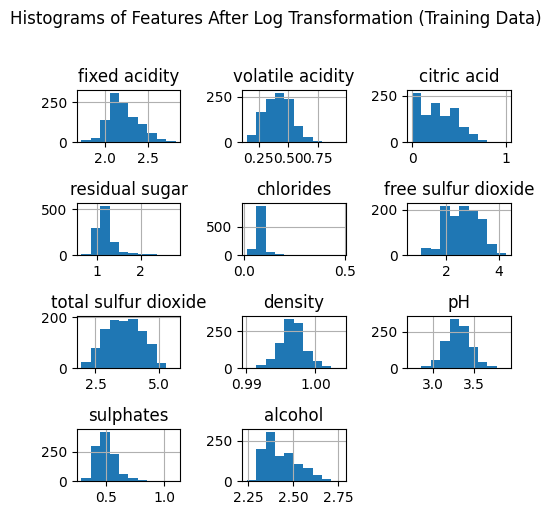

In [26]:
#  plot the histogram after the log transformation


# Plot histograms after log transformation
X_train.hist(bins=10, figsize=(5, 5))
plt.suptitle('Histograms of Features After Log Transformation (Training Data)', y=1.02)
plt.tight_layout()
plt.show()

In [27]:
#Standardize the feature data
scaler = StandardScaler()
feature_names = X_train.columns

# Scale the data and immediately wrap it in a DataFrame to preserve feature names
X_train_scaled_df = pd.DataFrame(scaler.fit_transform(X_train), columns=feature_names)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=feature_names)

print("Class distribution before SMOTE:\n", y_train.value_counts())

Class distribution before SMOTE:
 quality
0    937
1    150
Name: count, dtype: int64


In [28]:

print("Descriptive statistics of scaled training data:")
X_train_scaled_df.describe()

Descriptive statistics of scaled training data:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1.087000e+03,1.087000e+03,1.087000e+03,1.087000e+03,1.087000e+03,1.087000e+03,1.087000e+03,1.087000e+03,1.087000e+03,1.087000e+03,1.087000e+03
mean,6.855397e-16,4.951574e-16,-4.575712e-17,2.680060e-16,-2.124438e-17,-7.304798e-16,-1.192954e-16,-9.975053e-15,-3.019970e-15,-1.421739e-16,3.505322e-16
std,1.000460e+00,1.000460e+00,1.000460e+00,1.000460e+00,1.000460e+00,1.000460e+00,1.000460e+00,1.000460e+00,1.000460e+00,1.000460e+00,1.000460e+00
min,-2.774348e+00,-2.350786e+00,-1.399484e+00,-2.196678e+00,-1.686699e+00,-3.141870e+00,-2.448759e+00,-3.558505e+00,-3.742512e+00,-2.271165e+00,-2.075613e+00
25%,-6.865591e-01,-7.685994e-01,-8.874201e-01,-5.816943e-01,-3.967807e-01,-8.975694e-01,-7.267679e-01,-5.892839e-01,-6.540887e-01,-6.662478e-01,-8.771279e-01
50%,-1.537921e-01,1.343823e-02,-6.811813e-02,-2.057301e-01,-1.814692e-01,1.200980e-01,3.763978e-02,1.338619e-03,3.022591e-03,-2.031370e-01,-2.753181e-01
75%,5.616616e-01,6.780854e-01,7.511838e-01,2.441093e-01,5.308290e-02,7.401319e-01,7.546458e-01,5.919612e-01,5.944227e-01,4.856413e-01,6.588634e-01
max,3.473489e+00,4.641282e+00,3.721153e+00,6.058591e+00,9.074409e+00,2.681893e+00,2.941901e+00,3.754476e+00,3.879979e+00,6.257233e+00,3.616627e+00


In [29]:
# handling imbalance using smote
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the SCALED training data
# SMOTE is only applied to the training set to prevent the model from seeing synthetic
# versions of the test data.
# Because the input is a DataFrame, SMOTE will also output a DataFrame
smote = SMOTE(random_state=42)
X_train_scaled, y_train_smote = smote.fit_resample(X_train_scaled_df, y_train)

# The naming convention will remain the same here on but the order is now correct

In [30]:
# prompt: print the count of the data so that we know smote has worked

print("Count of the target variable after SMOTE:")
y_train_smote.value_counts()

Count of the target variable after SMOTE:


,count
quality,
1,937
0,937


In [31]:
# commenting out this part since the order was wrong
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train_smote)
#X_test_scaled = scaler.transform(X_test)  # Important: transform only for the test data so that there is no leak

In [32]:
# Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score , precision_score, recall_score, f1_score

#dafult spillter is best but without random_state set the output is different - tie breaking is random !
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train_smote)
y_pred_dt = dt.predict(X_test_scaled)

print("Decision Tree classifier")
print("confusion matrix (0  1)") # remember scikit learn uses 0 1 by default
print(confusion_matrix(y_test, y_pred_dt))
# look at the class 1 metrics
print(classification_report(y_test, y_pred_dt))
#printing all the main metrics for quick reference
print("\nImportant Model Evaluation Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_dt):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_dt):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_dt):.4f}")

Decision Tree classifier
confusion matrix (0  1)
[[209  29]
 [ 14  20]]
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       238
           1       0.41      0.59      0.48        34

    accuracy                           0.84       272
   macro avg       0.67      0.73      0.69       272
weighted avg       0.87      0.84      0.85       272


Important Model Evaluation Metrics:
Accuracy: 0.8419
Precision: 0.4082
Recall: 0.5882
F1-Score: 0.4819


for imbalance classes accuracy is not enough we need to look at the precision an recall and specifically the F1 score since that i high when both recall and precision are high - so a better indicator for our use case


In [33]:
# random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train_smote)
y_pred_rf =rf.predict(X_test_scaled)
print("Random Forest")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

print("\nImportant Model Evaluation Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf):.4f}")


Random Forest
[[213  25]
 [ 11  23]]
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       238
           1       0.48      0.68      0.56        34

    accuracy                           0.87       272
   macro avg       0.72      0.79      0.74       272
weighted avg       0.89      0.87      0.88       272


Important Model Evaluation Metrics:
Accuracy: 0.8676
Precision: 0.4792
Recall: 0.6765
F1-Score: 0.5610


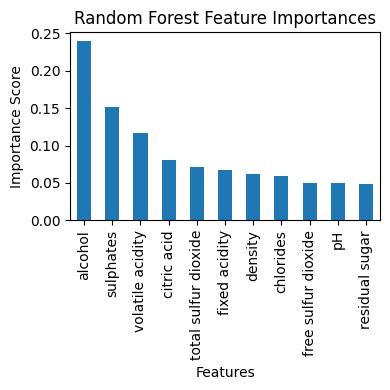

In [34]:
#plot the important features of the random forest model

# Get feature importances from the trained Random Forest model
feature_importances = pd.Series(rf.feature_importances_, index=X_train_scaled.columns)

# Sort the feature importances in descending order
sorted_importances = feature_importances.sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(4, 4))
sorted_importances.plot(kind='bar')
plt.title('Random Forest Feature Importances')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [35]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Assuming X_train_scaled, y_train_smote, X_test_scaled, y_test are already defined
# (These would come from your data loading and preprocessing steps)

# --- Hyperparameter Tuning for Random Forest ---

# Define the parameter distribution for RandomizedSearchCV
# Using distributions for continuous/integer parameters for better exploration
param_distributions_rf = {
    'n_estimators': randint(100, 151),  # Random integers from 100 to 150 (inclusive)
    'max_depth': randint(15, 31),       # Random integers from 15 to 30 (inclusive)
    'min_samples_split': randint(2, 11), # Random integers from 2 to 10 (inclusive)
    'min_samples_leaf': randint(1, 6),   # Random integers from 1 to 5 (inclusive)
    'class_weight': ['balanced']        # This remains a fixed list, as it's not a range
}

# Initialize the RandomForestClassifier
rf_base = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
# We target 'f1' as the scoring metric due to class imbalance
# n_iter: Number of parameter settings that are sampled. Increase for more exhaustive search.
# cv: Number of folds for cross-validation
# n_jobs: -1 means use all available processors
random_search_rf = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_distributions_rf,
    n_iter=100, # Increased iterations for better exploration
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit RandomizedSearchCV to the SMOTE-treated training data
print("\n--- Starting Random Forest Hyperparameter Tuning (Randomized Search) ---")
random_search_rf.fit(X_train_scaled, y_train_smote)

print("\n--- Tuning Complete ---")
print("Best parameters found for Random Forest:")
print(random_search_rf.best_params_)
print(f"Best F1-Score on training data (cross-validated): {random_search_rf.best_score_:.4f}")

# Get the best Random Forest model
best_rf_model = random_search_rf.best_estimator_

# Evaluate the best model on the test set
print("\n--- Evaluating Best Tuned Random Forest Model on Test Set ---")
y_pred_rf_tuned = best_rf_model.predict(X_test_scaled)

print("Tuned Random Forest")
print(confusion_matrix(y_test, y_pred_rf_tuned))
print(classification_report(y_test, y_pred_rf_tuned))

print("\nImportant Model Evaluation Metrics (Tuned Random Forest):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf_tuned):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf_tuned):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf_tuned):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf_tuned):.4f}")


--- Starting Random Forest Hyperparameter Tuning (Randomized Search) ---
Fitting 5 folds for each of 100 candidates, totalling 500 fits

--- Tuning Complete ---
Best parameters found for Random Forest:
{'class_weight': 'balanced', 'max_depth': 23, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 126}
Best F1-Score on training data (cross-validated): 0.9314

--- Evaluating Best Tuned Random Forest Model on Test Set ---
Tuned Random Forest
[[212  26]
 [ 11  23]]
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       238
           1       0.47      0.68      0.55        34

    accuracy                           0.86       272
   macro avg       0.71      0.78      0.74       272
weighted avg       0.89      0.86      0.87       272


Important Model Evaluation Metrics (Tuned Random Forest):
Accuracy: 0.8640
Precision: 0.4694
Recall: 0.6765
F1-Score: 0.5542


In [36]:
from sklearn.ensemble import AdaBoostClassifier
# AdaBoost Classifier
ab = AdaBoostClassifier(random_state=42)
ab.fit(X_train_scaled, y_train_smote)
y_pred_ab = ab.predict(X_test_scaled)

print("📌 AdaBoost Classifier")
print(confusion_matrix(y_test, y_pred_ab))
print(classification_report(y_test, y_pred_ab))

print("\nImportant Model Evaluation Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_ab):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_ab):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_ab):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_ab):.4f}")


📌 AdaBoost Classifier
[[198  40]
 [  5  29]]
              precision    recall  f1-score   support

           0       0.98      0.83      0.90       238
           1       0.42      0.85      0.56        34

    accuracy                           0.83       272
   macro avg       0.70      0.84      0.73       272
weighted avg       0.91      0.83      0.86       272


Important Model Evaluation Metrics:
Accuracy: 0.8346
Precision: 0.4203
Recall: 0.8529
F1-Score: 0.5631


In [37]:
# AdaBoost Classifier with 100 iterations
ab_100 = AdaBoostClassifier(n_estimators=100, random_state=42)
ab_100.fit(X_train_scaled, y_train_smote)
y_pred_ab_100 = ab_100.predict(X_test_scaled)

print("📌 AdaBoost Classifier with 100 estimators")
print(confusion_matrix(y_test, y_pred_ab_100))
print(classification_report(y_test, y_pred_ab_100))

print("\nImportant Model Evaluation Metrics (AdaBoost 100 estimators):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_ab_100):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_ab_100):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_ab_100):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_ab_100):.4f}")

📌 AdaBoost Classifier with 100 estimators
[[197  41]
 [  5  29]]
              precision    recall  f1-score   support

           0       0.98      0.83      0.90       238
           1       0.41      0.85      0.56        34

    accuracy                           0.83       272
   macro avg       0.69      0.84      0.73       272
weighted avg       0.91      0.83      0.85       272


Important Model Evaluation Metrics (AdaBoost 100 estimators):
Accuracy: 0.8309
Precision: 0.4143
Recall: 0.8529
F1-Score: 0.5577


PCA TRANSFORM


In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.90, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [39]:
from sklearn.neighbors import KNeighborsClassifier

# K-Nearest Neighbors with PCA transformed data
knc = KNeighborsClassifier()
knc.fit(X_train_scaled, y_train_smote)
y_pred_knc_pca = knc.predict(X_test_scaled)

print("\n K-Nearest Neighbors with PCA transformed data")
print("confusion matrix (0  1)")
print(confusion_matrix(y_test, y_pred_knc_pca))
print(classification_report(y_test, y_pred_knc_pca))

print("\nImportant Model Evaluation Metrics (K-Nearest Neighbors with PCA):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knc_pca):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knc_pca):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knc_pca):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_knc_pca):.4f}")



 K-Nearest Neighbors with PCA transformed data
confusion matrix (0  1)
[[174  64]
 [  7  27]]
              precision    recall  f1-score   support

           0       0.96      0.73      0.83       238
           1       0.30      0.79      0.43        34

    accuracy                           0.74       272
   macro avg       0.63      0.76      0.63       272
weighted avg       0.88      0.74      0.78       272


Important Model Evaluation Metrics (K-Nearest Neighbors with PCA):
Accuracy: 0.7390
Precision: 0.2967
Recall: 0.7941
F1-Score: 0.4320


In [40]:
# Train and evaluate KNN on the regular scaled dataset (without PCA)
knc_regular = KNeighborsClassifier()
knc_regular.fit(X_train_scaled, y_train_smote) # Use scaled data without PCA
y_pred_knc_regular = knc_regular.predict(X_test_scaled) # Use scaled test data without PCA

print("\n K-Nearest Neighbors on Regular Scaled Data")
print("confusion matrix (0  1)")
print(confusion_matrix(y_test, y_pred_knc_regular))
print(classification_report(y_test, y_pred_knc_regular))

print("\nImportant Model Evaluation Metrics (K-Nearest Neighbors on Regular Scaled Data):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knc_regular):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knc_regular):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knc_regular):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_knc_regular):.4f}")


 K-Nearest Neighbors on Regular Scaled Data
confusion matrix (0  1)
[[174  64]
 [  7  27]]
              precision    recall  f1-score   support

           0       0.96      0.73      0.83       238
           1       0.30      0.79      0.43        34

    accuracy                           0.74       272
   macro avg       0.63      0.76      0.63       272
weighted avg       0.88      0.74      0.78       272


Important Model Evaluation Metrics (K-Nearest Neighbors on Regular Scaled Data):
Accuracy: 0.7390
Precision: 0.2967
Recall: 0.7941
F1-Score: 0.4320


In [42]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21], # A range of K values to try
}

# Create a K-Nearest Neighbors Classifier instance
knn = KNeighborsClassifier()

# Set up GridSearchCV
# 'scoring' can be 'accuracy', 'f1', 'precision', 'recall' depending on what you prioritize
# 'cv' is the number of folds for cross-validation (e.g., 5 for 5-fold CV)
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)

# Fit GridSearchCV to your training data (important to use SMOTE data here if you applied it)
grid_search.fit(X_train_scaled, y_train_smote)

# Get the best parameters and best score
print(f"\nBest Parameters for KNN: {grid_search.best_params_}")
print(f"Best F1-Score (Cross-Validation): {grid_search.best_score_:.4f}")

# Train the final model with the best parameters found
best_knn_model = grid_search.best_estimator_

# Evaluate the best model on the unseen test data
y_pred_best_knn = best_knn_model.predict(X_test_scaled)

print("\n K-Nearest Neighbors on Regular Scaled Data (Tuned Model)")
print("confusion matrix (0  1)")
print(confusion_matrix(y_test, y_pred_best_knn))
print(classification_report(y_test, y_pred_best_knn))

Fitting 5 folds for each of 11 candidates, totalling 55 fits

Best Parameters for KNN: {'n_neighbors': 1}
Best F1-Score (Cross-Validation): 0.9270

 K-Nearest Neighbors on Regular Scaled Data (Tuned Model)
confusion matrix (0  1)
[[206  32]
 [ 15  19]]
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       238
           1       0.37      0.56      0.45        34

    accuracy                           0.83       272
   macro avg       0.65      0.71      0.67       272
weighted avg       0.86      0.83      0.84       272



In [43]:
from sklearn.svm import SVC

# Support Vector Classifier with PCA transformed data
svc = SVC(random_state=42)
svc.fit(X_train_pca, y_train_smote)
y_pred_svc_pca = svc.predict(X_test_pca)

print("\nSupport Vector Classifier with PCA transformed data")
print("confusion matrix (0  1)")
print(confusion_matrix(y_test, y_pred_svc_pca))
print(classification_report(y_test, y_pred_svc_pca))

print("\nImportant Model Evaluation Metrics (Support Vector Classifier with PCA):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svc_pca):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_svc_pca):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_svc_pca):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_svc_pca):.4f}")


Support Vector Classifier with PCA transformed data
confusion matrix (0  1)
[[186  52]
 [  5  29]]
              precision    recall  f1-score   support

           0       0.97      0.78      0.87       238
           1       0.36      0.85      0.50        34

    accuracy                           0.79       272
   macro avg       0.67      0.82      0.69       272
weighted avg       0.90      0.79      0.82       272


Important Model Evaluation Metrics (Support Vector Classifier with PCA):
Accuracy: 0.7904
Precision: 0.3580
Recall: 0.8529
F1-Score: 0.5043


In [44]:
# Support Vector Classifier on regular scaled data (without PCA)
svc_regular = SVC(random_state=42)
svc_regular.fit(X_train_scaled, y_train_smote) # Use scaled data without PCA
y_pred_svc_regular = svc_regular.predict(X_test_scaled) # Use scaled test data without PCA

print("\nSupport Vector Classifier on Regular Scaled Data")
print("confusion matrix (0  1)")
print(confusion_matrix(y_test, y_pred_svc_regular))
print(classification_report(y_test, y_pred_svc_regular))

print("\nImportant Model Evaluation Metrics (Support Vector Classifier on Regular Scaled Data):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svc_regular):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_svc_regular):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_svc_regular):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_svc_regular):.4f}")


Support Vector Classifier on Regular Scaled Data
confusion matrix (0  1)
[[193  45]
 [  4  30]]
              precision    recall  f1-score   support

           0       0.98      0.81      0.89       238
           1       0.40      0.88      0.55        34

    accuracy                           0.82       272
   macro avg       0.69      0.85      0.72       272
weighted avg       0.91      0.82      0.85       272


Important Model Evaluation Metrics (Support Vector Classifier on Regular Scaled Data):
Accuracy: 0.8199
Precision: 0.4000
Recall: 0.8824
F1-Score: 0.5505


In [45]:
# apply gradient boost to data without pca and report metrics

from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting Classifier without PCA
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_scaled, y_train_smote)
y_pred_gb = gb.predict(X_test_scaled)

print("\nGradient Boosting Classifier without PCA")
print("confusion matrix (0  1)")
print(confusion_matrix(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

print("\nImportant Model Evaluation Metrics (Gradient Boosting without PCA):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_gb):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_gb):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_gb):.4f}")



Gradient Boosting Classifier without PCA
confusion matrix (0  1)
[[202  36]
 [  9  25]]
              precision    recall  f1-score   support

           0       0.96      0.85      0.90       238
           1       0.41      0.74      0.53        34

    accuracy                           0.83       272
   macro avg       0.68      0.79      0.71       272
weighted avg       0.89      0.83      0.85       272


Important Model Evaluation Metrics (Gradient Boosting without PCA):
Accuracy: 0.8346
Precision: 0.4098
Recall: 0.7353
F1-Score: 0.5263


Model Performance Comparison (Ranked by F1-Score):
| Model                           |   Accuracy |   Precision |   Recall |   F1-Score |
|:--------------------------------|-----------:|------------:|---------:|-----------:|
| AdaBoost                        |     0.8346 |      0.4203 |   0.8529 |     0.5631 |
| Random Forest                   |     0.8676 |      0.4792 |   0.6765 |     0.5610 |
| Gradient Boosting               |     0.8346 |      0.4098 |   0.7353 |     0.5263 |
| Support Vector Classifier (PCA) |     0.7904 |      0.3580 |   0.8529 |     0.5043 |
| Decision Tree                   |     0.8419 |      0.4082 |   0.5882 |     0.4819 |
| K-Nearest Neighbors (PCA)       |     0.7390 |      0.2967 |   0.7941 |     0.4320 |


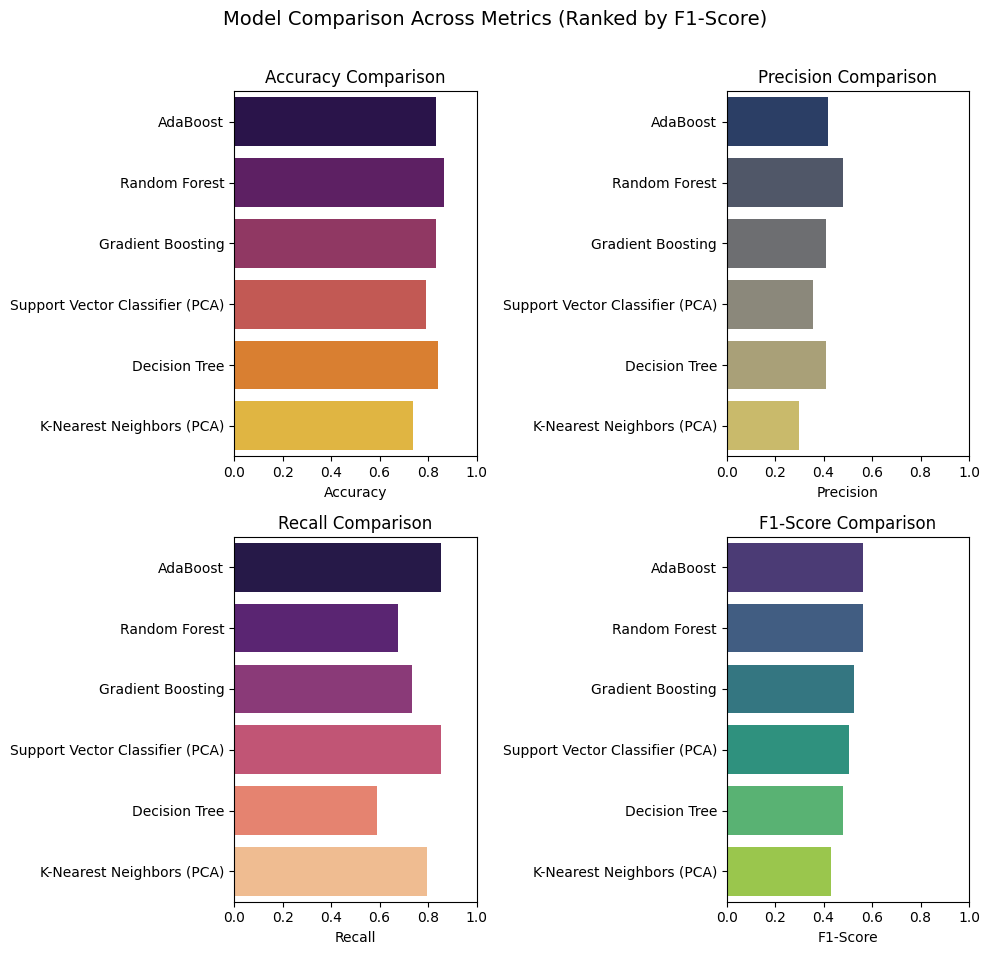

In [46]:
# Define model names
model_names = ['Decision Tree', 'Random Forest', 'AdaBoost',
               'K-Nearest Neighbors (PCA)', 'Support Vector Classifier (PCA)',
               'Gradient Boosting']

# Collect evaluation metrics
f1_scores = [
    f1_score(y_test, y_pred_dt),
    f1_score(y_test, y_pred_rf),
    f1_score(y_test, y_pred_ab),
    f1_score(y_test, y_pred_knc_pca),
    f1_score(y_test, y_pred_svc_pca),
    f1_score(y_test, y_pred_gb)
]

recall_scores = [
    recall_score(y_test, y_pred_dt),
    recall_score(y_test, y_pred_rf),
    recall_score(y_test, y_pred_ab),
    recall_score(y_test, y_pred_knc_pca),
    recall_score(y_test, y_pred_svc_pca),
    recall_score(y_test, y_pred_gb)
]

precision_scores = [
    precision_score(y_test, y_pred_dt),
    precision_score(y_test, y_pred_rf),
    precision_score(y_test, y_pred_ab),
    precision_score(y_test, y_pred_knc_pca),
    precision_score(y_test, y_pred_svc_pca),
    precision_score(y_test, y_pred_gb)
]

accuracy_scores = [
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_ab),
    accuracy_score(y_test, y_pred_knc_pca),
    accuracy_score(y_test, y_pred_svc_pca),
    accuracy_score(y_test, y_pred_gb)
]

# Create a DataFrame with all metrics
results_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-Score': f1_scores
})

# Rank by F1-Score
results_df_ranked = results_df.sort_values(by='F1-Score', ascending=False).reset_index(drop=True)

# Display table in terminal
print("Model Performance Comparison (Ranked by F1-Score):")
print(results_df_ranked.to_markdown(index=False, floatfmt=".4f"))

# Melt the DataFrame for easier Seaborn plotting
melted_df = results_df_ranked.melt(id_vars='Model',
                                   value_vars=['Accuracy', 'Precision', 'Recall', 'F1-Score'],
                                   var_name='Metric',
                                   value_name='Score')

# Set up a 2x2 subplot grid for the metrics
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
palettes = ['inferno', 'cividis', 'magma', 'viridis']

# Loop through and create one barplot per metric
for ax, metric, palette in zip(axes.flat, metrics, palettes):
    sns.barplot(data=melted_df[melted_df['Metric'] == metric],
                y='Model', x='Score', hue='Model', palette=palette, legend=False, ax=ax)

    ax.set_title(f'{metric} Comparison')
    ax.set_xlim(0, 1)
    ax.set_xlabel(metric)
    ax.set_ylabel('')

plt.suptitle('Model Comparison Across Metrics (Ranked by F1-Score)', fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()